In [78]:
import os
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

path_train = os.path.join('./', 'dataset_birds/train/')
classes = []
for item in os.listdir(path_train):
    classes.append(item)

In [79]:
images_count = []
for folder in classes:
    items = os.listdir(path_train+folder)
    images_count.append(len(items))

In [80]:
dict = {'classe': [], 'img_nbr': []}

for classe, nbr_images in zip(classes, images_count):
    dict['classe'].append(classe)
    dict['img_nbr'].append(nbr_images)

df = pd.DataFrame(dict)
df.set_index("classe")

,img_nbr
classe,
ABBOTTS BABBLER,163
ABBOTTS BOOBY,180
ABYSSINIAN GROUND HORNBILL,179
AFRICAN CROWNED CRANE,135
AFRICAN EMERALD CUCKOO,154
...,...
YELLOW BELLIED FLOWERPECKER,154
YELLOW BREASTED CHAT,202
YELLOW CACIQUE,155


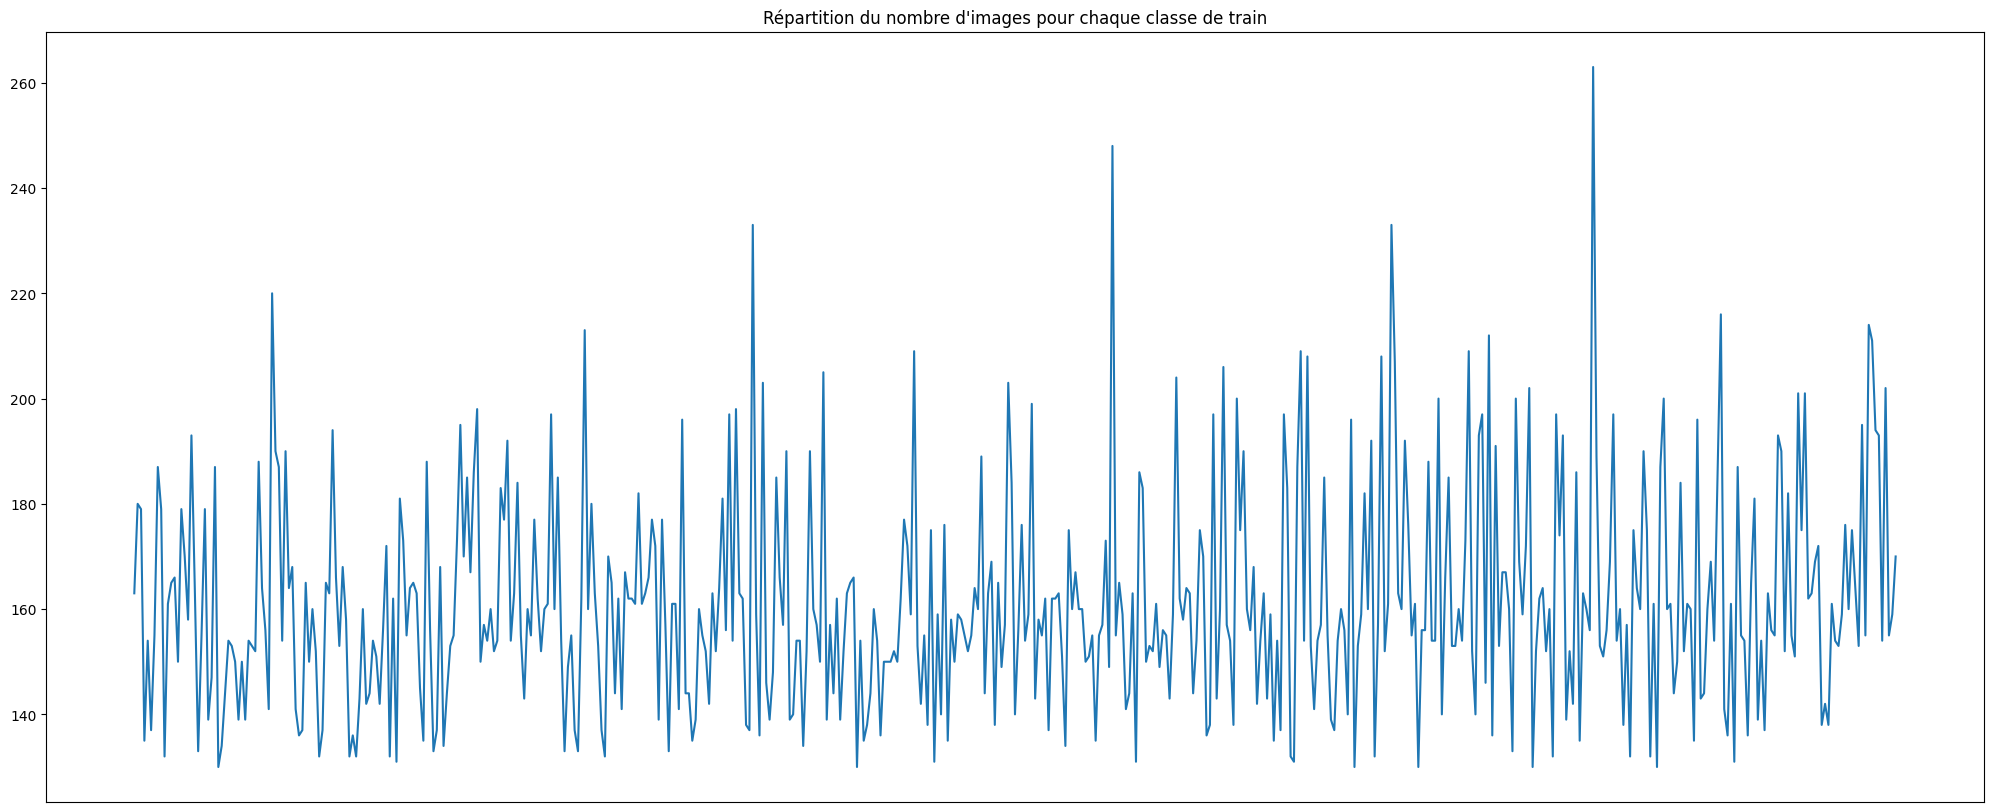

In [81]:
plt.figure(figsize = (25,10))
plt.plot(df.classe, df.img_nbr)
plt.title("Répartition du nombre d'images pour chaque classe de train")
plt.xticks([]);

<Figure size 1000x1200 with 0 Axes>

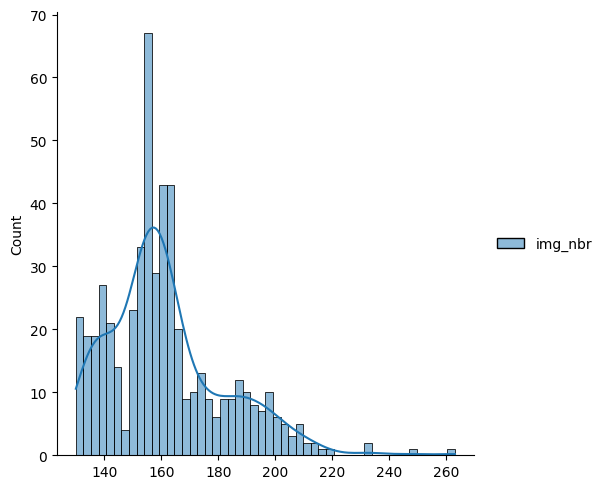

In [82]:
plt.figure(figsize=(10, 12))
sns.displot(df, kde = True, bins = 50);